### HEART DISEASE DETECTION

##### submitted by: Hangsajyoti Dhar, 170310007020

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.shape

(303, 14)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values # extracting only the lable and storing it in y

In [9]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)#80% in train set, 20% in test set

In [12]:
print(x_train.astype('int'))

[[43  0  2 ...  1  0  2]
 [66  0  2 ...  1  1  2]
 [58  1  2 ...  2  0  2]
 ...
 [56  1  3 ...  1  0  3]
 [47  1  2 ...  2  0  2]
 [58  1  1 ...  1  0  2]]


##### DECISION TREE CLASSIFIER

In [13]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='entropy',max_depth=7)
dc = dc.fit(x_train, y_train)
pred=dc.predict(x_test)
print(pred)

[0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)  #prediction percentage of the model
print(str(acc*100)+ " % "+ "accuracy by Decision tree classifier")

81.9672131147541 % accuracy by Decision tree classifier


##### RANDOM FOREST CLASSIFIER

In [15]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth=5)

In [16]:
forest = forest.fit(x_train, y_train)
pred1 = forest.predict(x_test)
print(pred1)

[0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [17]:
acc1 = accuracy_score(y_test, pred1)  #prediction percentage of the model
print(str(acc1*100)+ " % "+ "accuracy by Random Forest classifier")

88.52459016393442 % accuracy by Random Forest classifier


##### K NEAREST NEIGHBOUR

In [18]:
from sklearn.neighbors import KNeighborsClassifier
KSCORE = []
for k in range(1,51):
    knn_classifier = KNeighborsClassifier(n_neighbors=k) 
    knn_classifier.fit(x_train, y_train)
    KSCORE.append(knn_classifier.score(x_test,y_test))

In [19]:
kscore = [round(num,2) for num in KSCORE]
print(kscore)

[0.52, 0.59, 0.64, 0.64, 0.64, 0.66, 0.67, 0.69, 0.67, 0.66, 0.7, 0.67, 0.72, 0.67, 0.67, 0.67, 0.72, 0.69, 0.7, 0.69, 0.7, 0.69, 0.69, 0.66, 0.69, 0.67, 0.69, 0.69, 0.7, 0.7, 0.69, 0.66, 0.69, 0.66, 0.7, 0.67, 0.7, 0.7, 0.77, 0.74, 0.77, 0.75, 0.75, 0.77, 0.74, 0.74, 0.7, 0.7, 0.69, 0.74]


Text(0.5, 1.0, 'visualizing knn classifer score for differnt values of k')

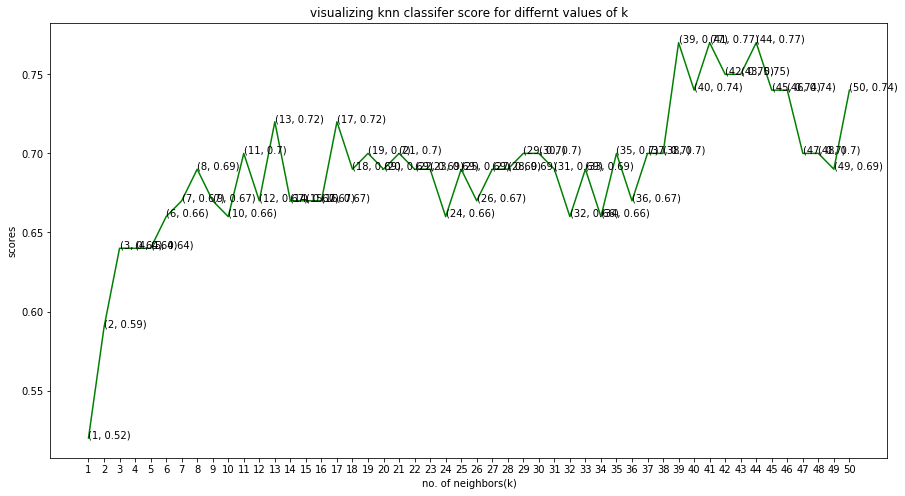

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)
plt.plot([k for k in range(1,51)], kscore, color ='green')
for i in range(1,51):
    plt.text(i, kscore[i-1], (i, kscore[i-1]) )   
plt.xticks([i for i in range(1,51)])
plt.xlabel('no. of neighbors(k)')
plt.ylabel('scores')
plt.title('visualizing knn classifer score for differnt values of k')

In [29]:
max(kscore)*100     #from graph we can see that we get max accuracy at k=42 and k=44

77.0

 ##### SUPPORT VECTOR CLASSIFIER

In [22]:
from sklearn.svm import SVC

In [26]:
sc = SVC(kernel= 'linear')
sc1 = sc.fit(x_train, y_train)

In [27]:
pred4 = sc1.predict(x_test)

In [28]:
acc4 = accuracy_score(y_test, pred4)

print(str(acc4*100)+ " % "+ "accuracy by SVC , kernel = linear")

81.9672131147541 % accuracy by SVC , kernel = linear


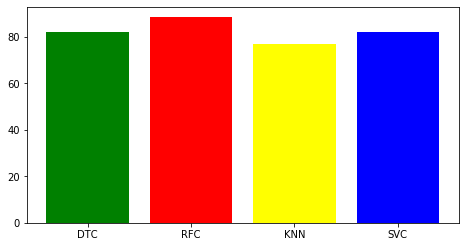

In [37]:
plt.rcParams['figure.figsize'] = (6,3)
fig = plt.figure()
a = fig.add_axes([0,0,1,1])
a.bar('DTC', 81.96, color='green')
a.bar('RFC', 88.52, color='red')
a.bar('KNN', 77.0, color='yellow')
a.bar('SVC', 81.97, color='blue')

plt.show()